# Machine Learning Menggunakan Python

Test Code By <a href="https://www.facebook.com/peny.ismail.77">Peny Ismail</a> - <a href="https://github.com/peny77/iS-Machine-Learning-Klasifikasi">Github</a>

### Klasifikasi

> Secara harfiah bisa dikatakan bahwa klasifikasi adalah pembagian sesuatu menurut kelas-kelas. Menurut Ilmu Pengetahuan, Klasifikasi adalah Proses pengelompokkan benda berdasarkan ciri-ciri persamaan dan perbedaan. (Wikipedia)

Klasifikasi dalam Data Mining adalah satu fungsi yang berguna untuk mengelompokkan item-item di suatu dataset ke dalam beberapa kategori atau target. Pengklasifikasian dapat digunakan untuk memprediksi suatu item di dataset masuk ke dalam target kelas yang mana berdasarkan nilai atribut-atribut yang dimilikinya. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

> kita akan menggunakan dataset Iris yang sangat populer untuk mempelajari pemodelan klasifikasi

> Jika terjadi Warning : FutureWarning: read_table is deprecated, use read_csv instead. seperti di atas ganti
>> pd.read_table() dengan pd.read_csv()

In [3]:
iris = pd.read_csv('tes/iris.data.txt', sep='\t')

In [4]:
iris.fillna(0, inplace=True)
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class,class_label
0,4.3,3.0,1.1,0.1,Iris-setosa,1
1,4.4,2.9,1.4,0.2,Iris-setosa,1
2,4.4,3.0,1.3,0.2,Iris-setosa,1
3,4.4,3.2,1.3,0.2,Iris-setosa,1
4,4.5,2.3,1.3,0.3,Iris-setosa,1
5,4.6,3.1,1.5,0.2,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1
7,4.6,3.6,1.0,0.2,Iris-setosa,1
8,4.6,3.2,1.4,0.2,Iris-setosa,1
9,4.7,3.2,1.3,0.2,Iris-setosa,1


* iris.fillna(0, inplace=True) untuk mengganti nilai yang hilang dengan nol (0), dalam kasus yang lain kita perlu mempertimbangkan nilai-nilai lain berdasarkan konteksnya<br>
* iris.head(10) adalah perintah untuk menampilkan data iris 10 baris

> Menampilkan dari kolom sepal_length, Jika inputnya adalah Seri / ndarray, pengembalian akan menjadi ndarray

In [5]:
print(iris['sepal_length'].unique())

[4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4 5.5 5.6 5.7 5.8 5.9 6.
 6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2 7.3 7.4 7.6 7.7 7.9]


In [6]:
print(iris.shape)

(150, 6)


> **Describe** adalah Ringkasan statistik dapat memberi Anda petunjuk apakah dataset cukup baik untuk dimodelkan

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,class_label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,2.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.350000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


> Dalam kasus di mana jarak itu penting, kita perlu menormalkan data. Kita harus mengukur dataset kita untuk pelatihan dan dataset pengujian.
>> Distribusi data

In [8]:
print(iris.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


> Count Plot dengan menggunakan **seaborn**

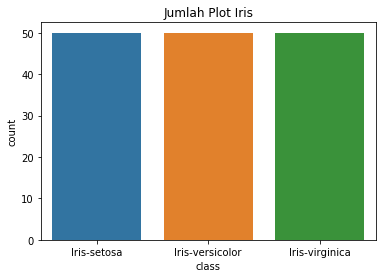

In [9]:
import seaborn as sns
sns.countplot(iris['class'],label='count')
plt.title('Jumlah Plot Iris')
plt.show()

> Box plot untuk setiap variabel numerik akan memberi kita gagasan yang lebih jelas tentang distribusi variabel input

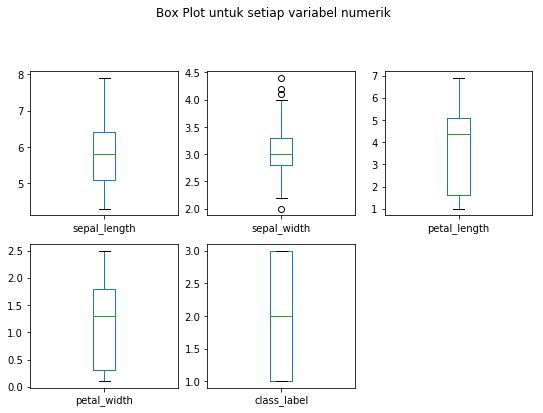

In [10]:
iris.drop('class', axis=1).plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(9,9), 
                                        title='Box Plot untuk setiap variabel numerik')
plt.show()

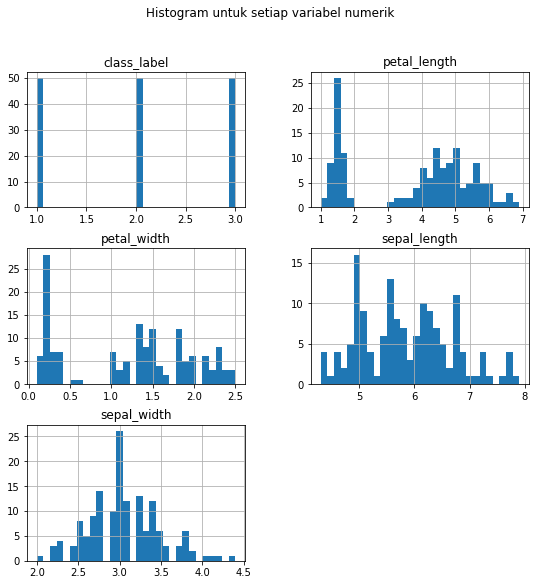

In [11]:
import pylab as pl
iris.drop('class' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram untuk setiap variabel numerik")
plt.show()

> Amati variabel mana yang memiliki distribusi Gaussian terdekat

> Jika terjadi ModuleNotFoundError: No module named 'pandas.tools'
>> ganti pandas.tools dengan pandas.plotting 

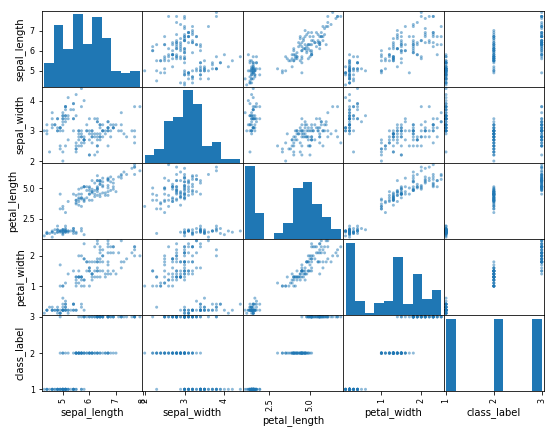

In [12]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris.drop('class', axis=1), figsize=(9, 7))
plt.show()

> Amati beberapa pasang atribut yang berkorelasi. Ini menunjukkan korelasi yang tinggi dan hubungan yang dapat diprediksi.

In [13]:
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = iris[feature_names]
colors = iris['sepal_length']
y = iris['class_label']

> Jika terjadi kesalahan AttributeError: module 'pandas' has no attribute 'scatter_matrix' itu terjadi karena module pandas tidak memiliki atribut scatter_matrix. 
> > Silahkan ganti pd.scatter_matrix() dengan scatter_matrix()

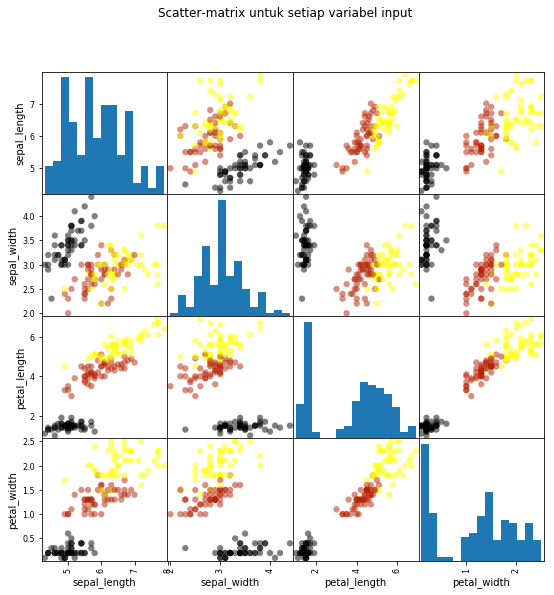

In [14]:
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix untuk setiap variabel input');

> Langkah berikutnya adalah membuat training and test sets <br>
> Kita membagi dataset menjadi satu training set dan satu test sets

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

> Terapkan scalling

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Membangun Models

#### Regresi logistik

In [17]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='lbfgs', multi_class='auto')
logreg.fit(X_train, y_train)

print('Akurasi klasifikasi regresi logistik pada training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Akurasi klasifikasi regresi logistik pada test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Akurasi klasifikasi regresi logistik pada training set: 0.91
Akurasi klasifikasi regresi logistik pada test set: 0.95


> Jika terjadi FutureWarning seperti diatas silahkan tambahkan
>> LogisticRegression() ganti LogisticRegression(solver='lbfgs', multi_class='auto')

#### Decision Tree

> Pohon Keputusan

In [18]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Akurasi pengklasifikasi Decision Tree pada training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Akurasi pengklasifikasi Decision Tree pada test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Akurasi pengklasifikasi Decision Tree pada training set: 1.00
Akurasi pengklasifikasi Decision Tree pada test set: 0.97


> Mengatur kedalaman maksimal Decision Tree untuk membantu menghindari overfitting

In [19]:
clf2 = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
print('Akurasi pengklasifikasi Decision Tree pada training set: {:.2f}'
     .format(clf2.score(X_train, y_train)))
print('Akurasi pengklasifikasi Decision Tree pada on test set: {:.2f}'
     .format(clf2.score(X_test, y_test)))

Akurasi pengklasifikasi Decision Tree pada training set: 1.00
Akurasi pengklasifikasi Decision Tree pada on test set: 0.97


#### K-Nearest Neighbors

In [20]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Akurasi pengklasifikasi K-NN pada training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Akurasi pengklasifikasi K-NN pada test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Akurasi pengklasifikasi K-NN pada training set: 0.96
Akurasi pengklasifikasi K-NN pada test set: 1.00


#### Linear Discriminant Analysis

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Akurasi pengklasifikasi LDA pada training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Akurasi pengklasifikasi LDA pada test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

Akurasi pengklasifikasi LDA pada training set: 0.97
Akurasi pengklasifikasi LDA pada test set: 1.00


#### Gaussian Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Akurasi pengklasifikasi GNB pada training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Akurasi pengklasifikasi GNB pada test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Akurasi pengklasifikasi GNB pada training set: 0.95
Akurasi pengklasifikasi GNB pada test set: 1.00


#### Support Vector Machine

In [23]:
from sklearn.svm import SVC

svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
print('Akurasi pengklasifikasi SVM pada training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Akurasi pengklasifikasi SVM pada test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Akurasi pengklasifikasi SVM pada training set: 0.94
Akurasi pengklasifikasi SVM pada test set: 1.00


> Jika terjadi FutureWarning seperti diatas silahkan tambahkan
>> SVC() diganti SVC(gamma='auto')

Kita akan membandingkan akurasi beberapa metode dan mengambil yang terbaik sebagai prediksi terbaik. **Algoritma KNN** tampaknya menjadi salah satu metode terbaik untuk prediksi. Tetapi harap _diingat_ bahwa kita hanya menggunakan dataset kecil. Dataset lebih besar mungkin dapat menghasilkan sesuatu yang berbeda.

In [24]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         9

   micro avg       1.00      1.00      1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



> Plot the decision boundary of the k-nn classifier

In [26]:
import matplotlib.cm as cm
import sklearn.neighbors as neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches

X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_iris_knn(X, y, n_neighbors, weights):
    X_mat = X[['petal_width', 'petal_length']].as_matrix()
    #y_mat = y.as_matrix()
    y_mat = y.values
    # Createvalues
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('petal width (cm)')
    plt.ylabel('petal length (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    
    plt.show()

In [29]:
import warnings
warnings.filterwarnings('ignore')

> K = 5

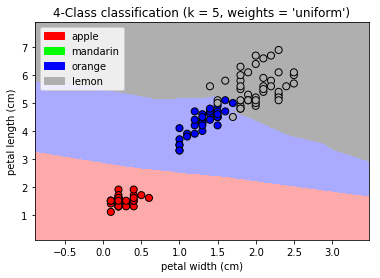

In [30]:
plot_iris_knn(X_train, y_train, 5, 'uniform')

> Jika ada FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead. seperti di atas, Kita bisa menghilangkannya dengan menambahkan baris dibawah ini
>> import warnings <br>
warnings.filterwarnings('ignore')

> K = 1

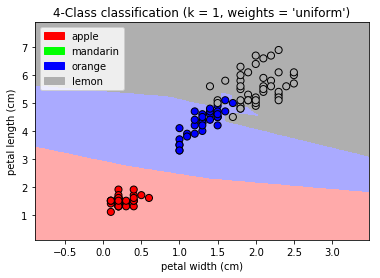

In [31]:
plot_iris_knn(X_train, y_train, 1, 'uniform')

> K = 10

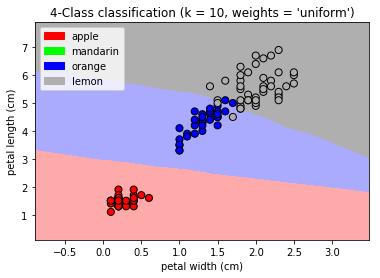

In [32]:
plot_iris_knn(X_train, y_train, 10, 'uniform')

> K= 5

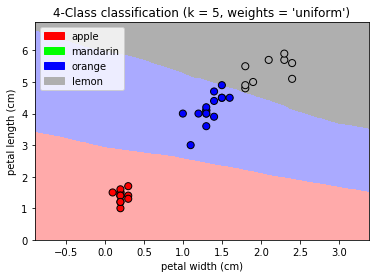

In [33]:
plot_iris_knn(X_test, y_test, 5, 'uniform')

([<matplotlib.axis.XTick at 0x1393e2d0>,
 <a list of 5 Text xticklabel objects>)

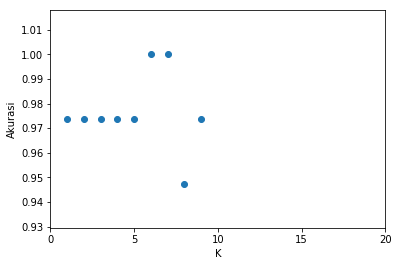

In [34]:
k_range = range(1, 10)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('K')
plt.ylabel('Akurasi')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Dan akhirnya K nomer berapa yang menghasilkan akurasi terbaik? :) <br>
Test Code By <a href="https://www.facebook.com/peny.ismail.77">Peny Ismail</a> - <a href="https://github.com/peny77/iS-Machine-Learning-Klasifikasi">Github</a>